In [60]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [61]:
class QuadraticState(TypedDict):
    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str

In [62]:
def show_equation(state: QuadraticState):
    eqn = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"

    return {"equation": eqn}


def calculate_discriminant(state: QuadraticState):
    discriminant = state['b']**2 - 4*state['a']*state['c']

    return {"discriminant": discriminant}


def roots(state: QuadraticState):
    if state['discriminant'] < 0:
        result = "No real roots"

    elif state['discriminant'] == 0:
        root = -state['b'] / (2*state['a'])
        result = f"One real root at x = {root}"

    else:
        root1 = (-state['b'] + state['discriminant']**0.5) / (2*state['a'])
        root2 = (-state['b'] - state['discriminant']**0.5) / (2*state['a'])

        result = f"Two real roots at x = {root1} and x = {root2}"

    return {"result": result}

In [63]:
graph = StateGraph(QuadraticState)

graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("roots", roots)

graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")
graph.add_edge("calculate_discriminant", "roots")
graph.add_edge("roots", END)

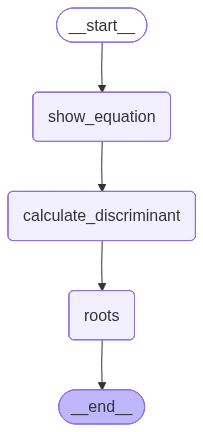

In [64]:
app = graph.compile()
app

In [65]:
response = app.invoke({
    "a": 4,
    "b": -5,
    "c": -4
})

In [66]:
print(response["equation"])

4x^2 + -5x + -4 = 0


In [67]:
print(response["discriminant"])

89


In [68]:
print(response["result"])

Two real roots at x = 1.8042476415070754 and x = -0.5542476415070754
